<a href="https://colab.research.google.com/github/hwon-n/section6_project1/blob/main/CP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 374 kB/s 


In [3]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 3.1 MB 69.3 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
     |████████████████████████████████| 102 kB 10.7 MB/s 
     |████████████████████████████████| 303 kB 57.4 MB/s 
     |████████████████████████████████| 675 kB 58.3 MB/s 
     |████████████████████████████████| 10.9 MB 46.6 MB/s 
     |████████████████████████████████| 812 kB 58.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8ccf875c19ce5f081703919231739ee6f25a6cf1a21ee31ff5cf68ef20a3da04
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=706e890ea5a07af68879362c6e9e05b507667ce174e8d34b982d6d3e8160847d
 

In [4]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
# 데이터 불러오기

train = pd.read_csv('/content/drive/MyDrive/Training Data.csv')
test = pd.read_csv('/content/drive/MyDrive/Test Data.csv')

train.shape, test.shape

((252000, 13), (28000, 12))

In [6]:
train.rename(columns = {'Married/Single': 'Married_Or_Single'}, inplace = True)
test.rename(columns = {'ID': 'Id', 'Married/Single': 'Married_Or_Single'}, inplace = True)

In [7]:
target = 'Risk_Flag'
train, val = train_test_split(train, train_size = 0.8, random_state = 42, stratify = train[target])
train.shape, val.shape

((201600, 13), (50400, 13))

## 데이터 확인


In [8]:
# train.profile_report()

In [9]:
train.head().T

,13714,51718,99982,107150,94564
Id,13715,51719,99983,107151,94565
Income,8132252,7915651,6272029,1832125,7954133
Age,72,64,49,54,31
Experience,7,8,12,13,7
Married_Or_Single,single,single,single,single,single
House_Ownership,rented,rented,rented,rented,rented
Car_Ownership,no,no,no,yes,yes
Profession,Mechanical_engineer,Psychologist,Drafter,Scientist,Drafter
CITY,Karaikudi,Jamnagar,Sagar,Vijayanagaram,Avadi
STATE,Tamil_Nadu,Gujarat,Madhya_Pradesh,Andhra_Pradesh,Tamil_Nadu


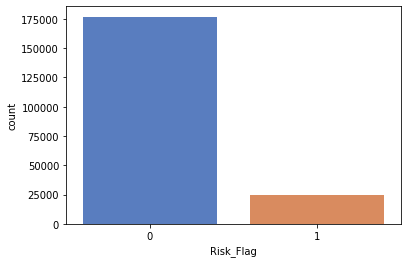

In [10]:
%matplotlib inline

ax = sns.set_palette('muted')
ax = sns.countplot(data = train, x = target)

plt.show()

# 0 -> 1로 바꿔주기
# 0: 대출 가능, 1: 대출 불가능 

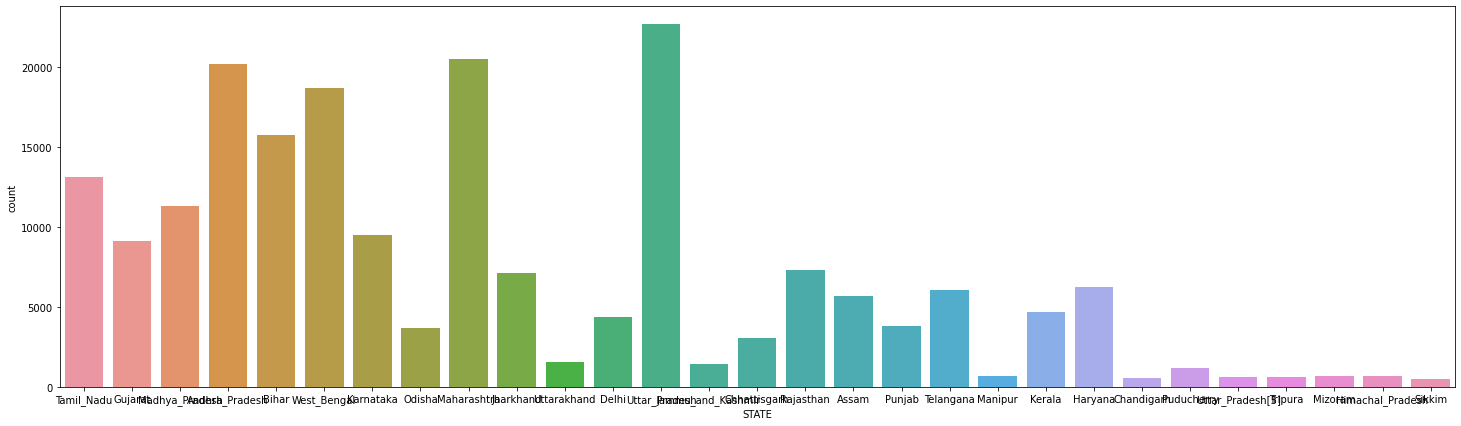

In [11]:
# STATE 탐색

plt.figure(figsize=(25,7))
ax = sns.countplot(data = train, x = 'STATE')
plt.show()

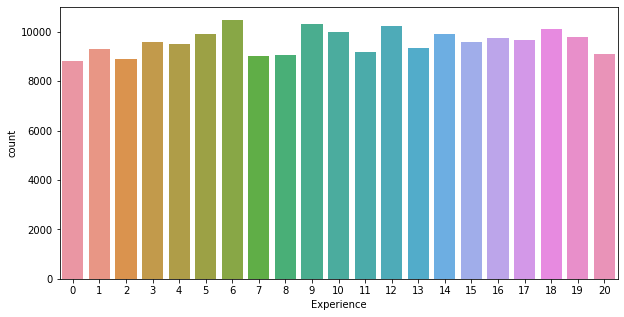

In [12]:
# Experience 탐색

plt.figure(figsize=(10,5))
ax = sns.countplot(data = train, x = 'Experience')
plt.show()

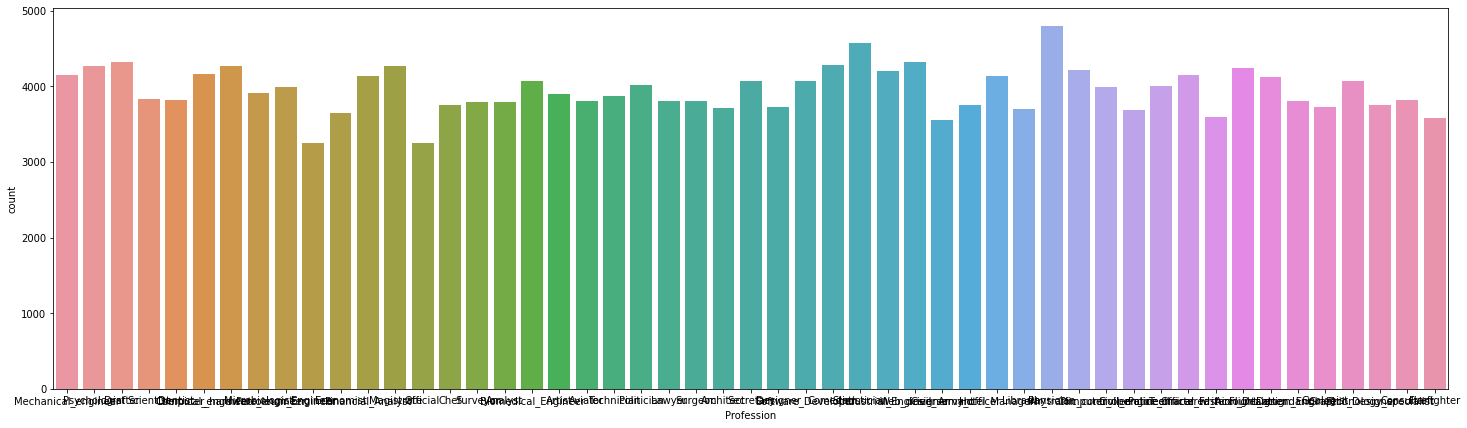

In [13]:
# Profession 탐색

plt.figure(figsize=(25, 7))
ax = sns.countplot(data = train, x = 'Profession')
plt.show()

In [14]:
train.Profession.unique()

array(['Mechanical_engineer', 'Psychologist', 'Drafter', 'Scientist',
       'Dentist', 'Chemical_engineer', 'Computer_hardware_engineer',
       'Microbiologist', 'Petroleum_Engineer', 'Engineer', 'Economist',
       'Financial_Analyst', 'Magistrate', 'Official', 'Chef', 'Surveyor',
       'Analyst', 'Biomedical_Engineer', 'Artist', 'Aviator',
       'Technician', 'Politician', 'Lawyer', 'Surgeon', 'Architect',
       'Secretary', 'Designer', 'Software_Developer', 'Comedian',
       'Statistician', 'Industrial_Engineer', 'Web_designer',
       'Civil_servant', 'Army_officer', 'Hotel_Manager', 'Librarian',
       'Physician', 'Air_traffic_controller', 'Computer_operator',
       'Civil_engineer', 'Police_officer', 'Technical_writer',
       'Chartered_Accountant', 'Fashion_Designer', 'Flight_attendant',
       'Design_Engineer', 'Geologist', 'Graphic_Designer',
       'Technology_specialist', 'Consultant', 'Firefighter'], dtype=object)

In [15]:
train.STATE.unique()

array(['Tamil_Nadu', 'Gujarat', 'Madhya_Pradesh', 'Andhra_Pradesh',
       'Bihar', 'West_Bengal', 'Karnataka', 'Odisha', 'Maharashtra',
       'Jharkhand', 'Uttarakhand', 'Delhi', 'Uttar_Pradesh',
       'Jammu_and_Kashmir', 'Chhattisgarh', 'Rajasthan', 'Assam',
       'Punjab', 'Telangana', 'Manipur', 'Kerala', 'Haryana',
       'Chandigarh', 'Puducherry', 'Uttar_Pradesh[5]', 'Tripura',
       'Mizoram', 'Himachal_Pradesh', 'Sikkim'], dtype=object)

In [16]:
train.CITY.unique()

array(['Karaikudi', 'Jamnagar', 'Sagar', 'Vijayanagaram', 'Avadi',
       'Hajipur[31]', 'Raiganj', 'Surendranagar_Dudhrej', 'Bangalore',
       'Raurkela_Industrial_Township', 'Kolhapur', 'Vasai-Virar',
       'Deoghar', 'Rajpur_Sonarpur', 'Haridwar', 'Satna',
       'Kirari_Suleman_Nagar', 'Firozabad', 'Jabalpur', 'Junagadh',
       'Srinagar', 'Chittoor[28]', 'Vadodara', 'Ramgarh', 'Thanjavur',
       'Bhilai', 'Sambalpur', 'Khandwa', 'Bardhaman', 'Pali', 'Jorhat',
       'Kanpur', 'Jhansi', 'Amritsar', 'Bidhannagar', 'South_Dumdum',
       'Nizamabad', 'Siwan[32]', 'Mau', 'Imphal', 'Bhusawal', 'Ahmedabad',
       'Pimpri-Chinchwad', 'Mumbai', 'New_Delhi', 'Thiruvananthapuram',
       'Bellary', 'Hapur', 'Ichalkaranji', 'Panihati', 'Kishanganj[35]',
       'Barasat', 'Medininagar', 'Begusarai', 'Unnao', 'Bikaner', 'Malda',
       'Bhalswa_Jahangir_Pur', 'Sonipat', 'Chandigarh_city', 'Surat',
       'Mahbubnagar', 'Pudukkottai', 'Hindupur', 'Bhiwandi', 'Ambarnath',
       'Anand', 'D

In [17]:
house = train.House_Ownership.value_counts()
car = train.Car_Ownership.value_counts()
marr_sin = train['Married_Or_Single'].value_counts()

# 색상 지정
pink = ['#F198AF', '#9F81CD', '#EF6D6D']
green = ['#65C18C', '#C1F4C5']
yellow = ['#FFCC00', '#FFEE00', '#FFFF66', '#FFF18D']

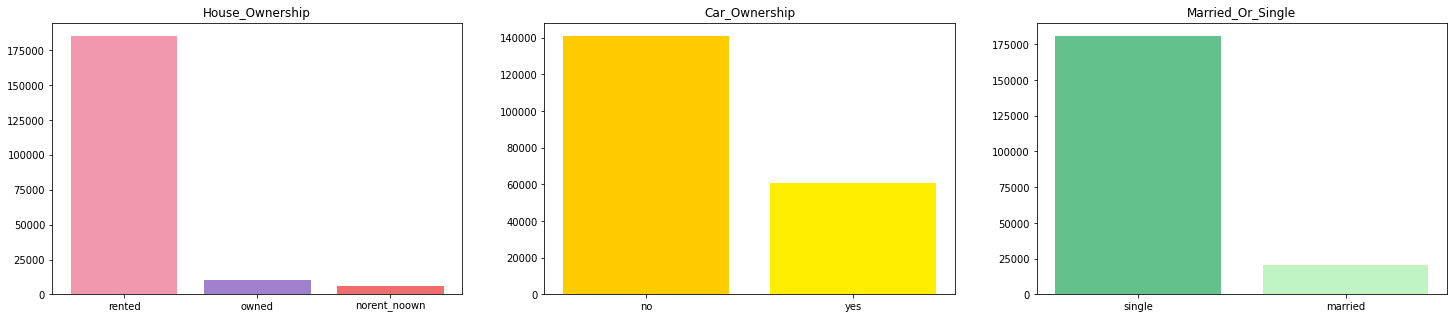

In [18]:
plt.figure(figsize = (25, 5))
plt.subplot(1, 3, 1)
plt.bar(house.index, house.values, color = pink)
plt.title('House_Ownership')

plt.subplot(1, 3, 2)
plt.bar(car.index, car.values, color = yellow)
plt.title('Car_Ownership')

plt.subplot(1, 3, 3)
plt.bar(marr_sin.index, marr_sin.values, color = green)
plt.title('Married_Or_Single')

plt.show();

## 데이터 전처리

In [19]:
# 지역 분류
north_state = ['West_Bengal', 'Bihar', 'Assam', 'Uttarakhand', 'Uttar_Paradesh', 'Uttar_Pradesh[5]',
               'Jammu_and_Kashmir', 'Rajasthan', 'Gujarat', 'Punjab', 'Manipur', 
                'Haryana', 'Sikkim', 'Mizoram', 'Madhya_Pradesh', 'Tripura',
               'Jharkhand', 'Chandigarh', 'Himachal_Pradesh']
south_state = ['Karnataka', 'Tamil_Nadu', 'Kerala', 'Andhra_Pradesh', 'Telangana', 
               'Maharashtra', 'Chhattisgarh', 'Odisha', 'Puducherry']

In [20]:
# 직업 분류
natural_sciences = ['Mechanical_engineer', 'Psychologist', 'Scientist', 'Dentist', 'Chemical_engineer',
                    'Engineer', 'Petroleum_Engineer', 'Drafter', 'Microbiologist', 'Biomedical_Engineer',
                    'Aviator', 'Technician', 'Surgeon', 'Architect', 'Software_Developer', 
                    'Industrial_Engineer', 'Web_designer', 'Physician', 'Air_traffic_controller',
                    'Computer_operator', 'Civil_engineer', 'Geologist', 'Computer_hardware_engineer',
                    'Technology_specialist']
liberal_arts = ['Economist', 'Financial_Analyst', 'Magistrate', 'Official', 'Chef', 'Surveyor',
                'Analyst', 'Artist', 'Politician', 'Lawyer', 'Secretary', 'Designer', 'Comedian',
                'Statistician', 'Police_officer', 'Technical_writer', 'Chartered_Accountant',
                'Fashion_Designer', 'Graphic_Designer', 'Consultant', 'Firefighter', 'Flight_attendant',
                'Design_Engineer', 'Army_officer', 'Civil_servant', 'Hotel_Manager', 'Librarian']

len(natural_sciences), len(liberal_arts)

(24, 27)

In [21]:
not_own = ['rented', 'norent_noown']

In [22]:
def age(age):
  if age > 60:
    return 'over 60s'
  elif age >= 40:
    return '4-50s'
  elif age >= 30:
    return '30s'
  else:
    return 'under 30s'

def region(state):
  if state in north_state:
    return 'North Area'
  elif state in south_state:
    return 'South Area'
  elif state == 'Delhi':
    return 'Capital'

def exp(exp):
  if exp <= 2:
    return 'Entry'
  elif exp <= 5:
    return 'Intermediate'
  elif exp <= 10:
    return 'Mid'
  else:
    return 'Senior'


def job_year(year):
  if year < 5:
    return 1
  elif year <= 10:
    return 2
  else:
    return 3

def house(h):
  if h in not_own:
    return 'not owned'
  else:
    return h

def prof(prof):
  if prof in natural_sciences:
    return 'Natural Sciences'
  elif prof in liberal_arts:
    return 'Liberal Arts'
  else:
    return 'No Info'

In [23]:
def feature(df):
  cols = ['Id', 'CITY']

  df.drop(columns = cols, inplace = True)
  df.reset_index(drop = True, inplace = True)

  if 'Risk_Flag' in df.columns:
    df.Risk_Flag = df.Risk_Flag.apply(lambda x: 1 if x == 0 else 0)

  df.Age = df.Age.apply(age)
  df.CURRENT_JOB_YRS = df.CURRENT_JOB_YRS.apply(job_year)
  df.STATE = df.STATE.apply(region)
  df.Experience = df.Experience.apply(exp)
  df.House_Ownership = df.House_Ownership.apply(house)
  df.Profession = df.Profession.apply(prof)

  return df

In [24]:
train = feature(train)
val = feature(val)
test = feature(test)

In [25]:
train.head().T

,0,1,2,3,4
Income,8132252,7915651,6272029,1832125,7954133
Age,over 60s,over 60s,4-50s,4-50s,30s
Experience,Mid,Mid,Senior,Senior,Mid
Married_Or_Single,single,single,single,single,single
House_Ownership,not owned,not owned,not owned,not owned,not owned
Car_Ownership,no,no,no,yes,yes
Profession,Natural Sciences,Natural Sciences,Natural Sciences,Natural Sciences,Natural Sciences
STATE,South Area,North Area,North Area,South Area,South Area
CURRENT_JOB_YRS,2,1,2,3,1
CURRENT_HOUSE_YRS,13,12,10,14,12


#### 데이터 전처리 결과 확인

In [26]:
prof = train.Profession.value_counts()
age = train.Age.value_counts()
exp = train.Experience.value_counts()
houseP = train.House_Ownership.value_counts()
region = train.STATE.value_counts()
job_yrs = train.CURRENT_JOB_YRS.value_counts()

In [27]:
color1 = ['#9ba9ff', '#afb1ff', '#cebeff', '#eccaff']
color2 = ['#71a5de', '#abc4ff', '#c1d3fe', '#d7e3fc']
color3 = ['#a5eeaa', '#c4f39d', '#e3f790', '#f3f98a']

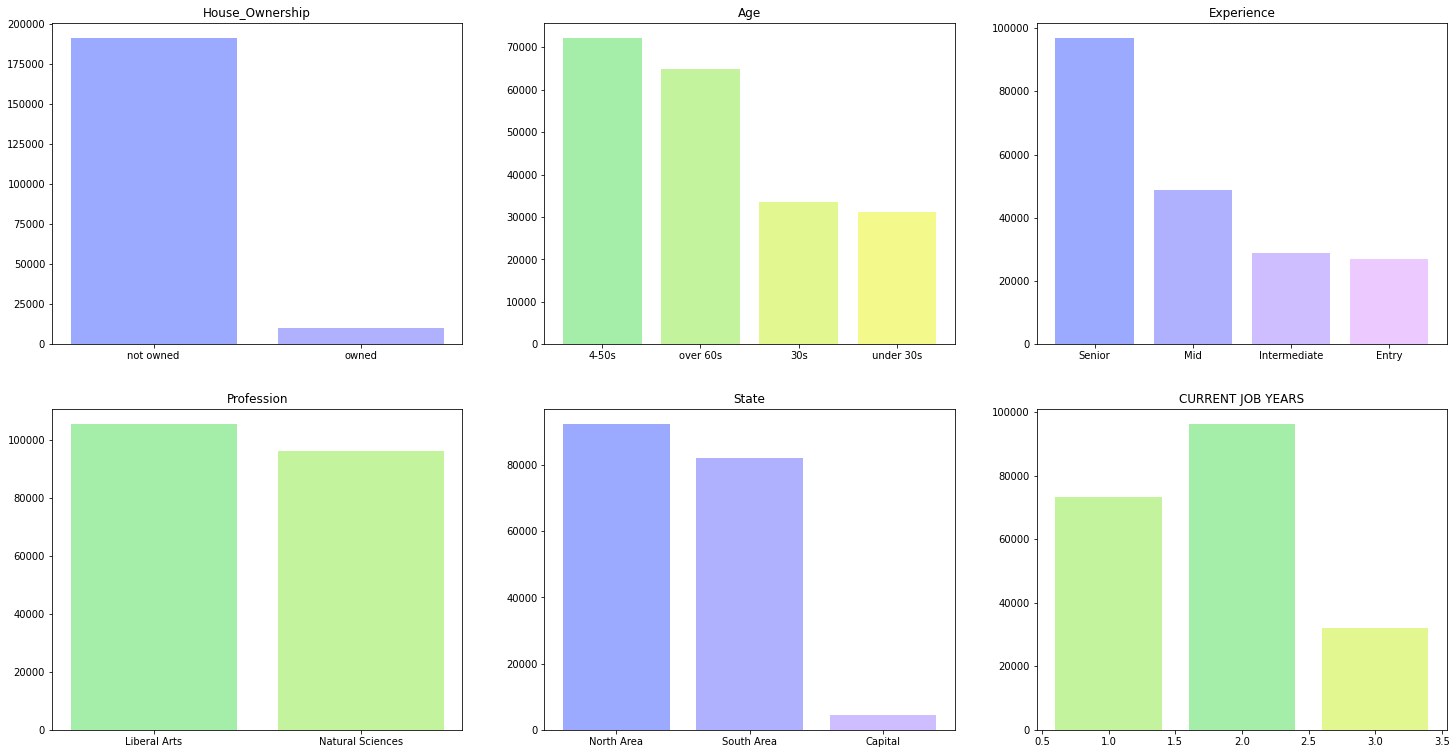

In [28]:
plt.figure(figsize = (25, 13))

plt.subplot(2, 3, 1)
plt.bar(houseP.index, houseP.values, color = color1)
plt.title('House_Ownership')

plt.subplot(2, 3, 2)
plt.bar(age.index, age.values, color = color3)
plt.title('Age')

plt.subplot(2, 3, 3)
plt.bar(exp.index, exp.values, color = color1)
plt.title('Experience')

plt.subplot(2, 3, 4)
plt.bar(prof.index, prof.values, color = color3)
plt.title('Profession')

plt.subplot(2, 3, 5)
plt.bar(region.index, region.values, color = color1)
plt.title('State')

plt.subplot(2, 3, 6)
plt.bar(job_yrs.index, job_yrs.values, color = color3)
plt.title('CURRENT JOB YEARS')

plt.show()


In [29]:
train.Risk_Flag.value_counts()

1    176803
0     24797
Name: Risk_Flag, dtype: int64

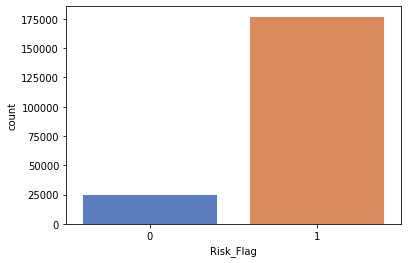

In [30]:
%matplotlib inline

ax = sns.set_palette('muted')
ax = sns.countplot(data = train, x = target)

plt.show()

## 모델 비교
(HIstGradientBoostingClassifier vs LightGBM vs XGBClassifier vs ExtraTreesClassifier)


In [31]:
X_train = train.drop(columns = target)
y_train = train[target]

X_val = val.drop(columns = target)
y_val = val[target]

In [32]:
ord_list = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
ord_mapping = [
           {'col': 'Age', 'mapping': {'under 30s': 1, '30s': 2, '4-50s': 3, 'over 60': 4, 'NaN': 0}},
           {'col': 'Experience', 'mapping': {'Entry': 1, 'Intermediate': 2, 'Mid': 3, 'Senior': 4, 'NaN': 0}},
           {'col': 'CURRENT_JOB_YRS', 'mapping': {3: 3, 2: 2, 1: 1, 'NaN': 0}},
           {'col': 'House_Ownership', 'mapping': {'owned': 2, 'not owned': 1, 'NaN': 0}}
]

In [33]:
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [42]:
# HistGradientBoostingClassifier

hist_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    StandardScaler(),
    HistGradientBoostingClassifier(
        max_iter = 200,
        learning_rate = 0.3,
        random_state = 42
    )
)
hist_pipe.fit(X_train, y_train)
y_pred = hist_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation Score: ', hist_pipe.score(X_val, y_val))
print('f1 Score: ', f1)
print('ROC Score: ', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Score:  0.8867261904761905
f1 Score:  0.9384547385215769
ROC Score:  0.5863311949778878
              precision    recall  f1-score   support

           0       0.63      0.19      0.29      6199
           1       0.90      0.98      0.94     44201

    accuracy                           0.89     50400
   macro avg       0.76      0.59      0.61     50400
weighted avg       0.86      0.89      0.86     50400



In [53]:
# LightGBM


light_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    StandardScaler(),
    LGBMClassifier(
        boosting = 'rf',
        bagging_fraction = 0.2,
        bagging_freq = 1,
        random_state = 42
    )
)
light_pipe.fit(X_train, y_train)
y_pred = light_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation Score: ', light_pipe.score(X_val, y_val))
print('f1 Score: ', f1)
print('ROC Score: ', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Score:  0.8772619047619048
f1 Score:  0.934574299312533
ROC Score:  0.5023661341974369
              precision    recall  f1-score   support

           0       0.63      0.01      0.01      6199
           1       0.88      1.00      0.93     44201

    accuracy                           0.88     50400
   macro avg       0.75      0.50      0.47     50400
weighted avg       0.85      0.88      0.82     50400



In [36]:
# XGBClassifier


xgb_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier(random_state = 42)
)
xgb_pipe.fit(X_train, y_train)
y_pred = xgb_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation Score: ', xgb_pipe.score(X_val, y_val))
print('f1 Score: ', f1)
print('ROC Score: ', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Score:  0.8770436507936508
f1 Score:  0.9344891379036947
ROC Score:  0.500300008760155
              precision    recall  f1-score   support

           0       0.67      0.00      0.00      6199
           1       0.88      1.00      0.93     44201

    accuracy                           0.88     50400
   macro avg       0.77      0.50      0.47     50400
weighted avg       0.85      0.88      0.82     50400



In [37]:
# ExtraTreesClassifier

extra_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    StandardScaler(),
    ExtraTreesClassifier(random_state = 42)
)
extra_pipe.fit(X_train, y_train)
y_pred =extra_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation Score: ',extra_pipe.score(X_val, y_val))
print('f1 Score: ', f1)
print('ROC Score: ', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Score:  0.8843055555555556
f1 Score:  0.9335051487609903
ROC Score:  0.756513657770796
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      6199
           1       0.94      0.93      0.93     44201

    accuracy                           0.88     50400
   macro avg       0.73      0.76      0.74     50400
weighted avg       0.89      0.88      0.89     50400

